<a href="https://colab.research.google.com/github/makhijakabir/assignments-ml/blob/main/Assignment_04_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image

In [2]:
data=pd.read_csv("/content/Assignment04MLDT.csv")

In [4]:
data

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [5]:
data.describe()

,ID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [6]:
data['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [8]:
le=LabelEncoder();
x=data.iloc[:,:-1] 
x=x.apply(le.fit_transform)

print("Age with encodd value:",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value:",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender with encoded value:",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus with encoded value:",list( zip(data.iloc[:,3], x.iloc[:,3])))


Age with encodd value: [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13)]

Income with encoded value: [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Gender with encoded value: [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

maritialStatus with encoded value: [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]


In [9]:
y=data.iloc[:,-1]

In [11]:
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [20]:
test_x=np.array([1,1,0,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input [Age < 21, Income = Low, Gender = Female, Marital Status = Married]", test_x, "is", pred_y[0])

Predicted class for input [Age < 21, Income = Low, Gender = Female, Marital Status = Married] [1 1 0 0 0] is No


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


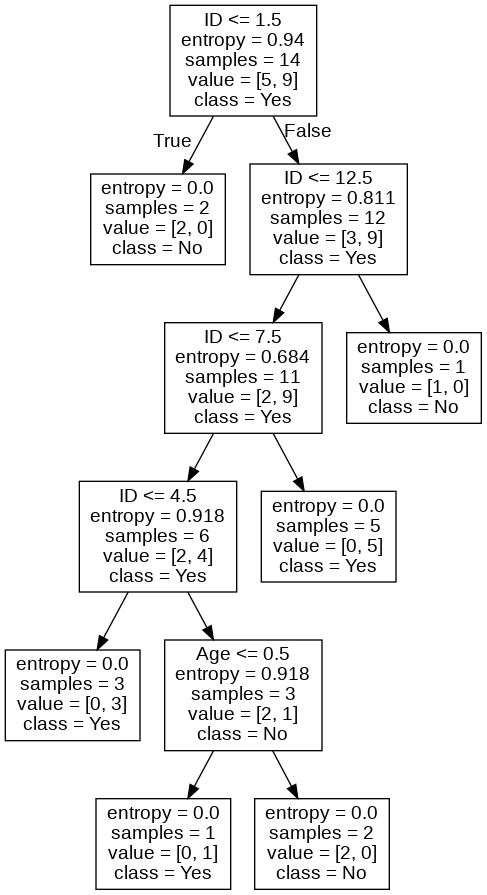

In [23]:
export_graphviz(classifier,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
!dot -Tpng data.dot -o tree.png
Image("tree.png")